In [1]:
import emcee
from scipy.optimize import minimize
import corner
import ptemcee
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emukit.core import ParameterSpace, ContinuousParameter
from GPy.models import MultioutputGP
from GPy import likelihoods
from emukit.model_wrappers import GPyMultiOutputWrapper
from GPy.kern import RBF

### 1-dimensional input, 2-dimensional outputs

Define simple test functions: sine and cosine

In [2]:
def f(X):
    y1 = np.sin(X) #+ np.random.normal(size=1,loc=0,scale=0.1)
    y2 = np.cos(X) #+ np.random.normal(size=1,loc=0,scale=0.1)
    return [y1,y2]

Generate initial design points

In [3]:
from emukit.core.initial_designs import RandomDesign

parameter_space = ParameterSpace([ContinuousParameter('x', 0, 1)])
design = RandomDesign(parameter_space)
num_data_points = 2
X = design.get_samples(num_data_points)
X = 8 * X - 4 # convert to [-4,4]

In [4]:
X

array([[1.44389353],
       [0.34608062]])

In [5]:
Y = f(X)

In [6]:
kernel1 = RBF(input_dim=1)
kernel2 = RBF(input_dim=1)
model_gpy = MultioutputGP([X,X],Y,
                          likelihood_list=[likelihoods.Gaussian(),likelihoods.Gaussian()],
                          kernel_list=[kernel1,kernel2])
model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=2, n_optimization_restarts=10)
model_emukit.optimize()

Optimization restart 1/10, f = 4.008442580242841
Optimization restart 2/10, f = 4.044648210918612
Optimization restart 3/10, f = 4.008442580191412
Optimization restart 4/10, f = 4.243395248912178
Optimization restart 5/10, f = 4.008442580196903
Optimization restart 6/10, f = 4.008442580220908
Optimization restart 7/10, f = 4.008442580217697
Optimization restart 8/10, f = 4.008442580192578
Optimization restart 9/10, f = 4.008442580200542
Optimization restart 10/10, f = 4.0084425802352435


In [7]:
from emukit.experimental_design.acquisitions.contour_MultiObs import contourWeightedEI

Set target: true parameter = 0.5

In [8]:
a_list = [np.sin(0.5), np.cos(0.5)]
alpha_list = [2, 2]
w_list = [0.5, 0.5]

In [9]:
contour_MD = contourWeightedEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list, w_list = w_list)

In [10]:
from emukit.experimental_design import ExperimentalDesignLoop
expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = contour_MD,
                                         batch_size = 1)

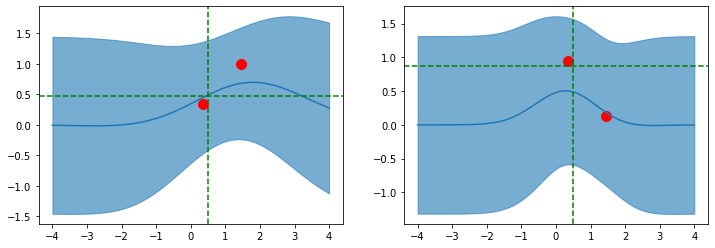

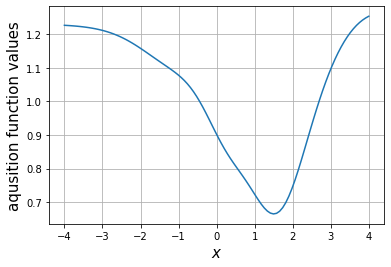

[[0.]]
Optimization restart 1/10, f = 2.5411221723549207
Optimization restart 2/10, f = 2.5411221799952215
Optimization restart 3/10, f = 2.541122164997465
Optimization restart 4/10, f = 2.5411221738779837
Optimization restart 5/10, f = 2.541122213983761
Optimization restart 6/10, f = 2.541122208277985
Optimization restart 7/10, f = 2.5411222546121475
Optimization restart 8/10, f = 2.5411221644550483
Optimization restart 9/10, f = 3.9202714549315467
Optimization restart 10/10, f = 2.541122166287945


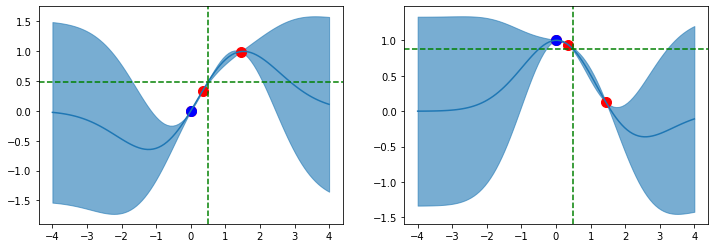

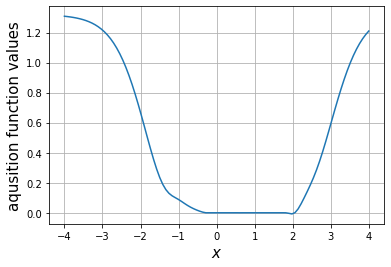

[[0.49720515]]
Optimization restart 1/10, f = -5.653481128134166
Optimization restart 2/10, f = -5.653481598241063
Optimization restart 3/10, f = -5.6534816025647645
Optimization restart 4/10, f = -5.653481573417574
Optimization restart 5/10, f = -5.653481582717338
Optimization restart 6/10, f = -5.653481549477048
Optimization restart 7/10, f = -5.653481606905228
Optimization restart 8/10, f = -5.653481542234298
Optimization restart 9/10, f = -5.653481604161763
Optimization restart 10/10, f = -5.653481390040803


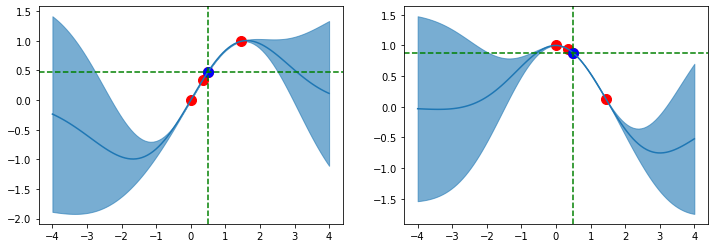

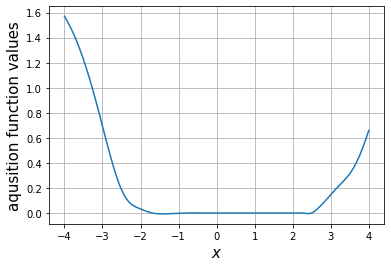

[[0.50311804]]
Optimization restart 1/10, f = -21.48786778674861
Optimization restart 2/10, f = -21.48786610802128
Optimization restart 3/10, f = -21.487867796249432
Optimization restart 4/10, f = -21.487867803282697
Optimization restart 5/10, f = -21.487867710485936
Optimization restart 6/10, f = -21.487867808193066
Optimization restart 7/10, f = -21.48786778156299
Optimization restart 8/10, f = -21.487867636502898
Optimization restart 9/10, f = -21.48786779091229
Optimization restart 10/10, f = -21.487867806163514


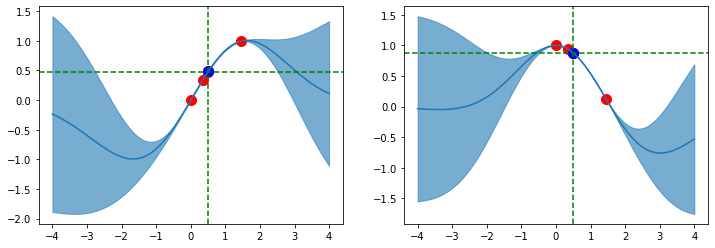

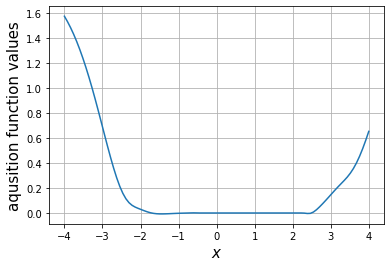

[[0.50243824]]
Optimization restart 1/10, f = -37.65223664638597
Optimization restart 2/10, f = -37.65223667162968
Optimization restart 3/10, f = -37.65223648736263
Optimization restart 4/10, f = -37.652235635561226
Optimization restart 5/10, f = -37.652236667418606
Optimization restart 6/10, f = -37.65223675030627
Optimization restart 7/10, f = -37.65223671870612
Optimization restart 8/10, f = -37.652236652595235
Optimization restart 9/10, f = -37.65223659658653
Optimization restart 10/10, f = -37.652236662200764


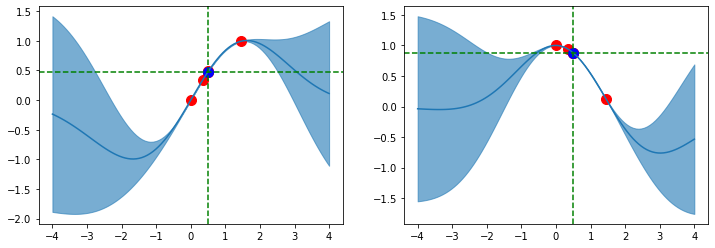

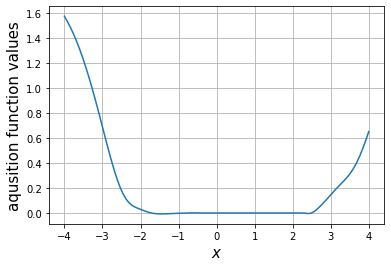

[[0.49999868]]
Optimization restart 1/10, f = -53.95047056730745
Optimization restart 2/10, f = -53.95047024942613
Optimization restart 3/10, f = -53.95047040363005
Optimization restart 4/10, f = -53.950468685033584
Optimization restart 5/10, f = -53.95047051508128
Optimization restart 6/10, f = -53.95047055608225
Optimization restart 7/10, f = -53.95047045281005
Optimization restart 8/10, f = -53.95047046579248
Optimization restart 9/10, f = -53.95047044795358
Optimization restart 10/10, f = -53.95047048713276


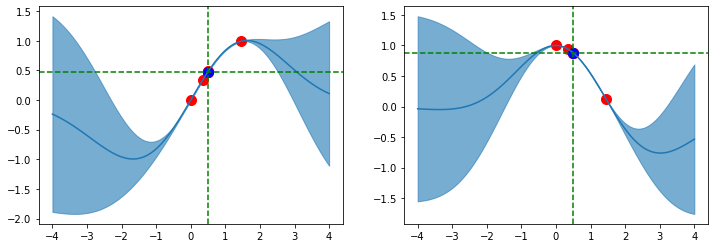

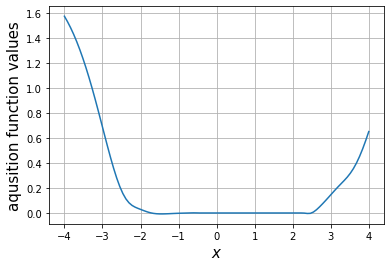

[[0.49999356]]
Optimization restart 1/10, f = -70.31201435213714
Optimization restart 2/10, f = -70.31200691946478
Optimization restart 3/10, f = -70.31201405908936
Optimization restart 4/10, f = -70.31201438528996
Optimization restart 5/10, f = -70.3120141955068
Optimization restart 6/10, f = -70.31200746583153
Optimization restart 7/10, f = -70.31201427278373
Optimization restart 8/10, f = -70.31201418314959
Optimization restart 9/10, f = -70.31201297803835
Optimization restart 10/10, f = -70.31201433913898


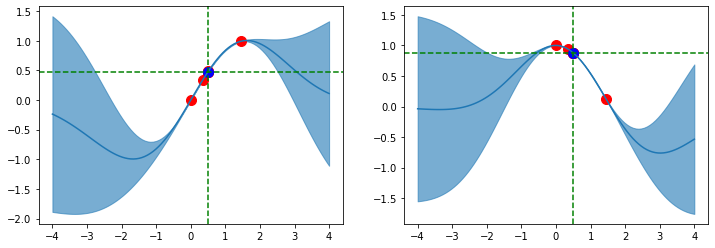

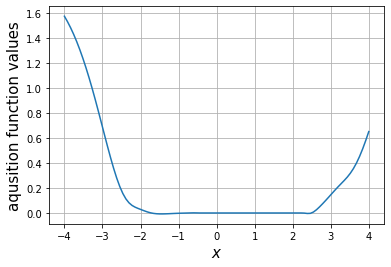

[[0.50001076]]
Optimization restart 1/10, f = -86.71372170734767
Optimization restart 2/10, f = -86.71372167877765
Optimization restart 3/10, f = -86.71364066577942
Optimization restart 4/10, f = -86.71372182234845
Optimization restart 5/10, f = -86.71372163703546
Optimization restart 6/10, f = -86.7137216603167
Optimization restart 7/10, f = -86.71372141209397
Optimization restart 8/10, f = -86.71371646445701
Optimization restart 9/10, f = -86.71337909236784
Optimization restart 10/10, f = -86.71372165731952


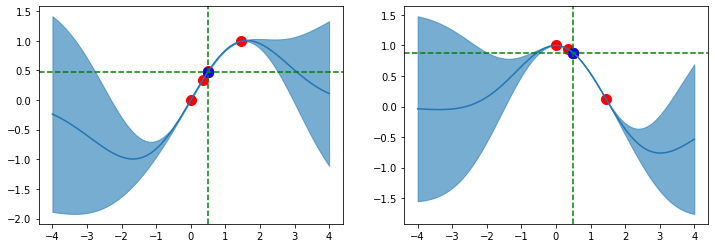

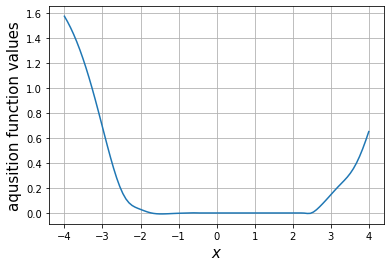

[[0.50099002]]
Optimization restart 1/10, f = -103.1411728196536
Optimization restart 2/10, f = -103.14113373306026
Optimization restart 3/10, f = -103.1411685495626
Optimization restart 4/10, f = -103.14117309745649
Optimization restart 5/10, f = -103.1411729294895
Optimization restart 6/10, f = -103.14117230364019
Optimization restart 7/10, f = -103.1411727686821
Optimization restart 8/10, f = -103.14117295774821
Optimization restart 9/10, f = -103.14117287194593
Optimization restart 10/10, f = -103.1411136959004


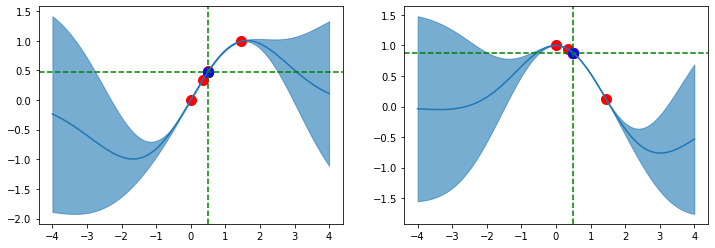

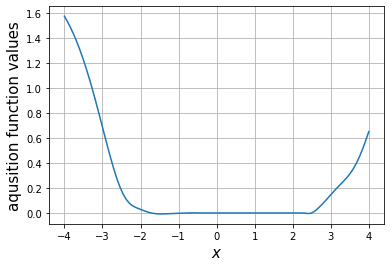

[[0.5027653]]
Optimization restart 1/10, f = -119.58381628882306
Optimization restart 2/10, f = -119.58381661084375
Optimization restart 3/10, f = -119.58381661334131
Optimization restart 4/10, f = -119.58381672645451
Optimization restart 5/10, f = -119.58381672868306
Optimization restart 6/10, f = -119.58381667868461
Optimization restart 7/10, f = -119.58381670579841
Optimization restart 8/10, f = -119.58381667570602
Optimization restart 9/10, f = -119.58381655434069
Optimization restart 10/10, f = -119.583816682409


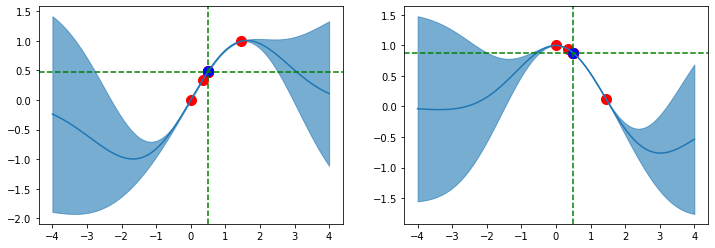

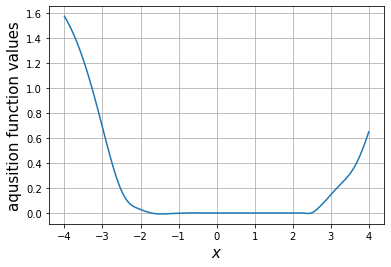

[[0.5017816]]
Optimization restart 1/10, f = -136.04682186384235
Optimization restart 2/10, f = -136.04682159036062
Optimization restart 3/10, f = -136.04682114325817
Optimization restart 4/10, f = -136.04682081029537
Optimization restart 5/10, f = -136.04682152728847
Optimization restart 6/10, f = -136.0468004374846
Optimization restart 7/10, f = -136.04681962100318
Optimization restart 8/10, f = -136.04681967938757
Optimization restart 9/10, f = -136.04682091087153
Optimization restart 10/10, f = -136.04682209479222


In [11]:
# with figures
max_iterations = 10
x_plot = np.linspace(-4, 4,100).reshape(-1,1)

for i in range(0,max_iterations):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    
    # first observable
    obsNo = 0
    new_column = [[obsNo]]*len(x_plot) # predict for ith emulator
    pred_temp = model_emukit.predict(np.append(x_plot,new_column,axis=1))
    m_vec = pred_temp[0] # vector of predictive means
    s2_vec = pred_temp[1] # vector of predictive variances
    
    x1_temp = model_emukit.X[model_emukit.X[:,1]==obsNo,0].reshape(-1,1)
    y1_temp = model_emukit.Y[obsNo*len(x1_temp):(obsNo+1)*len(x1_temp)]
    
    ax1.plot(x1_temp, y1_temp, "ro", markersize=10, label="Observations")
    if i > 0 :
        ax1.plot(xnew, f(xnew)[obsNo], "bo", markersize=10, label="Observations")
    ax1.plot(x_plot, m_vec, "C0", label="Model")
    ax1.fill_between(x_plot[:, 0],
                 m_vec[:, 0] + 1.96 * np.sqrt(s2_vec)[:, 0],
                 m_vec[:, 0] - 1.96 * np.sqrt(s2_vec)[:, 0], color="C0", alpha=0.6, label=r'1.96$\sigma$')
    ax1.axhline(y=a_list[obsNo], color='g', linestyle='--')
    ax1.axvline(x=0.5, color='g', linestyle='--')
    
    # second observable
    obsNo = 1
    new_column = [[obsNo]]*len(x_plot) # predict for ith emulator
    pred_temp = model_emukit.predict(np.append(x_plot,new_column,axis=1))
    m_vec = pred_temp[0] # vector of predictive means
    s2_vec = pred_temp[1] # vector of predictive variances
    
    x2_temp = model_emukit.X[model_emukit.X[:,1]==obsNo,0].reshape(-1,1)
    y2_temp = model_emukit.Y[obsNo*len(x1_temp):(obsNo+1)*len(x1_temp)]
    
    ax2.plot(x2_temp, y2_temp, "ro", markersize=10, label="Observations")
    if i > 0 :
        ax2.plot(xnew, f(xnew)[obsNo], "bo", markersize=10, label="Observations")
    ax2.plot(x_plot, m_vec, "C0", label="Model")
    ax2.fill_between(x_plot[:, 0],
                 m_vec[:, 0] + 1.96 * np.sqrt(s2_vec)[:, 0],
                 m_vec[:, 0] - 1.96 * np.sqrt(s2_vec)[:, 0], color="C0", alpha=0.6, label=r'1.96$\sigma$')
    ax2.axhline(y=a_list[obsNo], color='g', linestyle='--')
    ax2.axvline(x=0.5, color='g', linestyle='--')
    plt.show()
    
    # plot acquisition
    plt.figure(figsize=(6,4))
    aqu_values= contour_MD.evaluate(x=x_plot)
    plt.plot(x_plot, aqu_values)
    plt.xlabel(r"$x$", fontsize=15)
    plt.ylabel('aqusition function values', fontsize=15)
    plt.grid(True)
    plt.show()
    
    # Compute next point
    xnew = expdesign_loop.get_next_points(None) # what should be the input here for the "results"?
    print(xnew)
    X = np.append(X,xnew).reshape(-1,1)
    y1 = np.append(Y[0],f(xnew)[0]).reshape(-1,1)
    y2 = np.append(Y[1],f(xnew)[1]).reshape(-1,1)
    Y = [y1,y2]
    model_gpy = MultioutputGP([X,X],Y,
                          likelihood_list=[likelihoods.Gaussian(),likelihoods.Gaussian()],
                          kernel_list=[kernel1,kernel2])
    model_emukit = GPyMultiOutputWrapper(model_gpy, n_outputs=2, n_optimization_restarts=10)
    model_emukit.optimize()
    contour_MD = contourWeightedEI(modelwrapper = model_emukit, a_list = a_list, alpha_list = alpha_list, w_list = w_list)
    expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = contour_MD,
                                         batch_size = 1)
    

#### Issues to solve:
1. xnew = expdesign_loop.get_next_points(None): what should be the input parameters?
2. The acquisition plots do not look correct?

In [12]:
from emukit.core.loop import OuterLoop
help(OuterLoop.get_next_points)

Help on function get_next_points in module emukit.core.loop.outer_loop:

get_next_points(self, results: List[emukit.core.loop.user_function_result.UserFunctionResult], context: dict = {}) -> numpy.ndarray
    This method is used when the user doesn't want Emukit to evaluate the function of interest but rather just wants
    the input locations to evaluate the function at. This method calculates the new input locations.
    
    :param results: Function results since last loop step
    :param context: A dictionary of fixed parameters, identical to the context used in
                    self.run_loop()
    :return: Next batch of points to run

